<a href="https://colab.research.google.com/github/sohag221/Machine-Learning-/blob/main/Customer_Churn_Prediction(Internet_User).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import some necessary library**



In [53]:
import pandas as pd
import numpy as np
import seaborn as sns

In [54]:
#read data set
df=pd.read_csv('/content/sample_data/Customer_churn_Prediction(Internet user).csv')

In [55]:
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [56]:
df.shape

(7043, 21)

<Axes: xlabel='count', ylabel='Churn'>

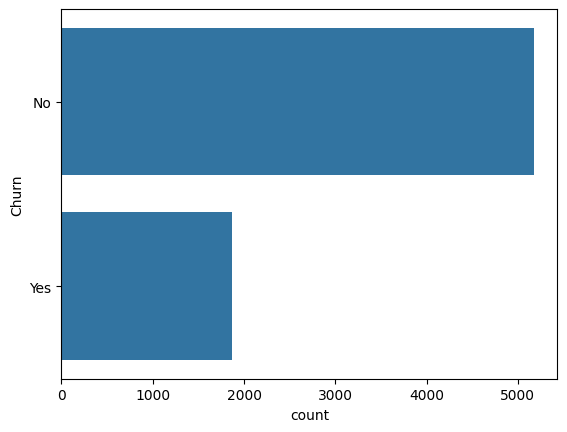

In [57]:
sns.countplot(df['Churn'])

In [58]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [59]:
Churne = df[df.Churn == 'Yes'].shape[0]
No_Churne = df[df.Churn == 'No'].shape[0]

In [60]:
churne_per=((Churne/(Churne+No_Churne))*100)
no_churne_per=(No_Churne/(Churne+No_Churne))*100

In [61]:
churne_per

26.536987079369588

In [62]:
no_churne_per

73.4630129206304

In [63]:
#check null values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [64]:
#drop unnecessary featrures
df=df.drop(['customerID'],axis=1)

**Lebel Encoder**

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
for col in df.columns:
  if df[col].dtype=='object':
    encoder=LabelEncoder()
    df[col]=encoder.fit_transform(df[col])

In [67]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [68]:
x=df.drop(['Churn'],axis=1)
y=df['Churn']

**Scaler**

In [69]:
from sklearn.preprocessing import StandardScaler


In [70]:
featur_x=StandardScaler().fit_transform(x)

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test=train_test_split(featur_x,y,test_size=0.2,random_state=42)

In [73]:
x_test

array([[-1.00955867, -0.44014635,  1.03453023, ...,  0.39855772,
        -1.32816441, -0.642709  ],
       [ 0.99053183, -0.44014635, -0.96662231, ..., -1.47405205,
        -1.31320824,  1.72841048],
       [-1.00955867, -0.44014635,  1.03453023, ...,  1.33486261,
        -1.50930029, -1.68953865],
       ...,
       [ 0.99053183, -0.44014635,  1.03453023, ..., -1.47405205,
        -1.49102052, -0.21275165],
       [-1.00955867, -0.44014635,  1.03453023, ..., -0.53774716,
        -0.69169616, -0.37160288],
       [ 0.99053183, -0.44014635, -0.96662231, ...,  1.33486261,
        -1.11046901, -0.2969428 ]])

**Train Logistic Regression Model**

In [74]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

model=LogisticRegression()

In [75]:
model.fit(x_train,y_train)

LogisticRegression()

In [76]:
model.score(x_train,y_train)

0.8040468583599574

In [77]:
confusion_matrix(y_test,model.predict(x_test))

array([[940,  96],
       [164, 209]])

In [78]:
prediction=model.predict(x_test)

In [79]:
prediction.shape

(1409,)

In [80]:
y_test.shape

(1409,)